Η εργασία διεκπεραιώθηκε από :
Μιχάλης Τατάς(sdi1700161) ΑΜ: 1115201700161 , 
Γιώργος Φλώρος(sdi1700178) ΑΜ: 1115201700178

Ως σχεδιαστική επιλογή dropάραμε τα στοιχεία με NaN values στα ερωτήματα που ερωτήσεις αφορούσαν αυτές τις τιμές έτσι ώστε αν σε κάποιο άλλο ερώτημα μπορούσαν να αξιοποιηθούν να μπορεί αυτό να γίνει. Η εργασία υλοποιήθηκε μέσω Google Colab και απαιτούνται τα αρχεία στο drive για να γίνει το διάβασμα

In [ ]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import sys
from google.colab import drive
import numpy as np
import random
from sklearn.metrics import pairwise_distances

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/ασκ1.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/")

In [ ]:
# reading netflix csv file #
Location = r'/content/drive/My Drive/netflix_titles.csv'
 
netflix_ds = pd.read_csv(Location)
 
# netflix_ds

In [ ]:
# reading imdb movies file #
Location_imdb = r'/content/drive/My Drive/IMDb movies.csv'
 
Imdb_ds = pd.read_csv(Location_imdb)
 
# Imdb_ds

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Movie
AxesSubplot(0.125,0.125;0.775x0.755)


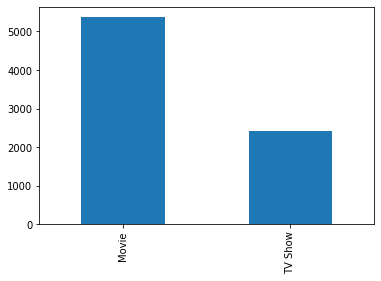

In [ ]:
## Query 1 ##
 
type_counts = netflix_ds['type'].value_counts()
 
print(type_counts.idxmax())  # find index with biggest frequency #
print(type_counts.plot(kind='bar'))


Για το ερώτημα 2 κάνουμε convert την στήλη με τις ημερομηνίες από string σε datetime και στην συνέχεια κρατάμε το year από την ημερομηνία. Για κάθε χρονιά εμφανίζουμε πόσες σειρές έχει προσθέσει το netflix και αντίστοιχα πόσες ταινίες

In [ ]:
## Query 2 ##
years_added = netflix_ds[['type','date_added']]
#drop nan values
years_added = years_added.dropna(axis=0)
#convert string to datetime
years_added['date_added'] = pd.to_datetime(years_added.date_added)
#keep only year from datetime
years_added['date_added'] = years_added['date_added'].dt.year
#group by dates_added
years_new = years_added.groupby('date_added')

#checks total adding counts
print(years_new.agg(['count']))

#avoid printing floats
# pd.options.display.float_format = '{:,.0f}'.format

years_new["type"].value_counts().unstack(fill_value=0)

# ean exoume xrono na kanoume grafima

            type
           count
date_added      
2008           2
2009           2
2010           1
2011          13
2012           3
2013          11
2014          25
2015          88
2016         443
2017        1225
2018        1685
2019        2153
2020        2009
2021         117


type,Movie,TV Show
date_added,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0
2013,6,5
2014,19,6
2015,58,30
2016,258,185


ΕΡΩΤΗΜΑ3 : Αρχικά παίρνουμε την κατηγορία country για να δούμε πόσες φορές εμφανίζεται κάθε χώρα ανεξαρτήτως θεματολογίας, ύστερα σπάμε τα κελιά, τα οποία περιέχουν παραπάνω απο μία χώρες, ώστε να μετρηθούν ξεχωριστά και μετά μετράμε το πόσες φορές εμφανίζεται κάθε χώρα και εκτυπώνουμε την πρώτη.

In [ ]:
## Question 3 ##

## because there are countries separated than comma must split them first and then count the distinct values ##

countries = pd.DataFrame(netflix_ds['country'])

# drop nan values
df = countries.dropna(axis=0)

# split countries separated by comma in the same cell and create a new row for each one of them
df = pd.DataFrame(df.country.str.replace(', ',',').str.split(',').tolist(), index=df.country).stack()
df = df.reset_index([0, 'country'])
df.columns = ['country', 'splitCountries']

df = df['splitCountries'].value_counts()
df.head(1)

United States    3297
Name: splitCountries, dtype: int64

ΕΡΩΤΗΜΑ 4 : Σπάμε την κατηγορία listed_in, η οποία περιέχει το περιεχόμενο, διότι σε πολλά κελιά αναφέρονται 2 η 3 είδη περιεχομένου και στη συνέχεια το ίδιο κάνουμε και για τις χώρες, καθώς παρατηρείται το ίδιο φαινόμενο. Στη συνέχεια εκτυπώνουμε αριθμητικά πόσες κατηγορίες έχει η κάθε χώρα

In [ ]:
## Question 4 ##
# used column listed_in for this one not column genre #
# for every country prints every content category     #

contentType = netflix_ds.drop(netflix_ds.columns.difference(['country', 'listed_in']),1)

# drop nan values
df = contentType.dropna(axis=0)

# split listed_in column to separate multiple values in the same cell
# and concatanate with countries
# then use melt function to convert the new columns to rows as shoul

newdf = pd.DataFrame(df.listed_in.str.replace(', ',',').str.split(',').tolist())
df = pd.concat([df, newdf], axis=1)
# column not needed anymore since it being split is all we want
df = df.drop(['listed_in'], 1)
df = df.melt(id_vars=["country"], value_name="listed_in")
# drop nans
df = df.dropna(axis=0)
# drop variable column which melt creates, its not needed just its values i.e. listed_in
df = df.drop(['variable'], 1)


# will do the same thing for the column "country"

newdf = pd.DataFrame(df.country.str.replace(', ',',').str.split(',').tolist())
df = pd.concat([df, newdf], axis=1)
# column not needed anymore since it being split is all we want
df = df.drop(['country'], 1)
df = df.melt(id_vars=["listed_in"], value_name="country")
# # drop nans
df = df.dropna(axis=0)
# # drop variable column which melt creates, its not needed just its values i.e. listed_in
df = df.drop(['variable'], 1)


df = df.drop_duplicates()

# now we only have unique pairs of country and listed_in value

###########################################################################
#does it wants united states 70 ... etc or united states comedy drama etc##
#may need groupby instead of value counts
###########################################################################
df = df['country'].value_counts()


df


United States     42
United Kingdom    39
Canada            39
India             39
Japan             36
                  ..
Puerto Rico        1
Sudan              1
Paraguay           1
Nicaragua          1
Sri Lanka          1
Name: country, Length: 114, dtype: int64

ΕΡΩΤΗΜΑ 5 : Αρχικά για τις ταινίες παίρνουμε τις στήλες country, cast, type και άμα το type δεν είναι movie δεν το κρατάμε και ύστερα κάνουμε drop όλη τη στήλη type αφου δεν την χρειαζόμαστε πλέον. Στη συνέχεια σπάμε πάλι τις χώρες όπως και παραπάνω και μετά για κάθε μοναδική χώρα σπάμε και το cast ώστε να πάρουμε όλα τα ονόματα μεμονομένα και κάνουμε ενα plot για κάθε χωρα με τους 4 ηθοποιούς με τις περισσότερες ταινίες. 

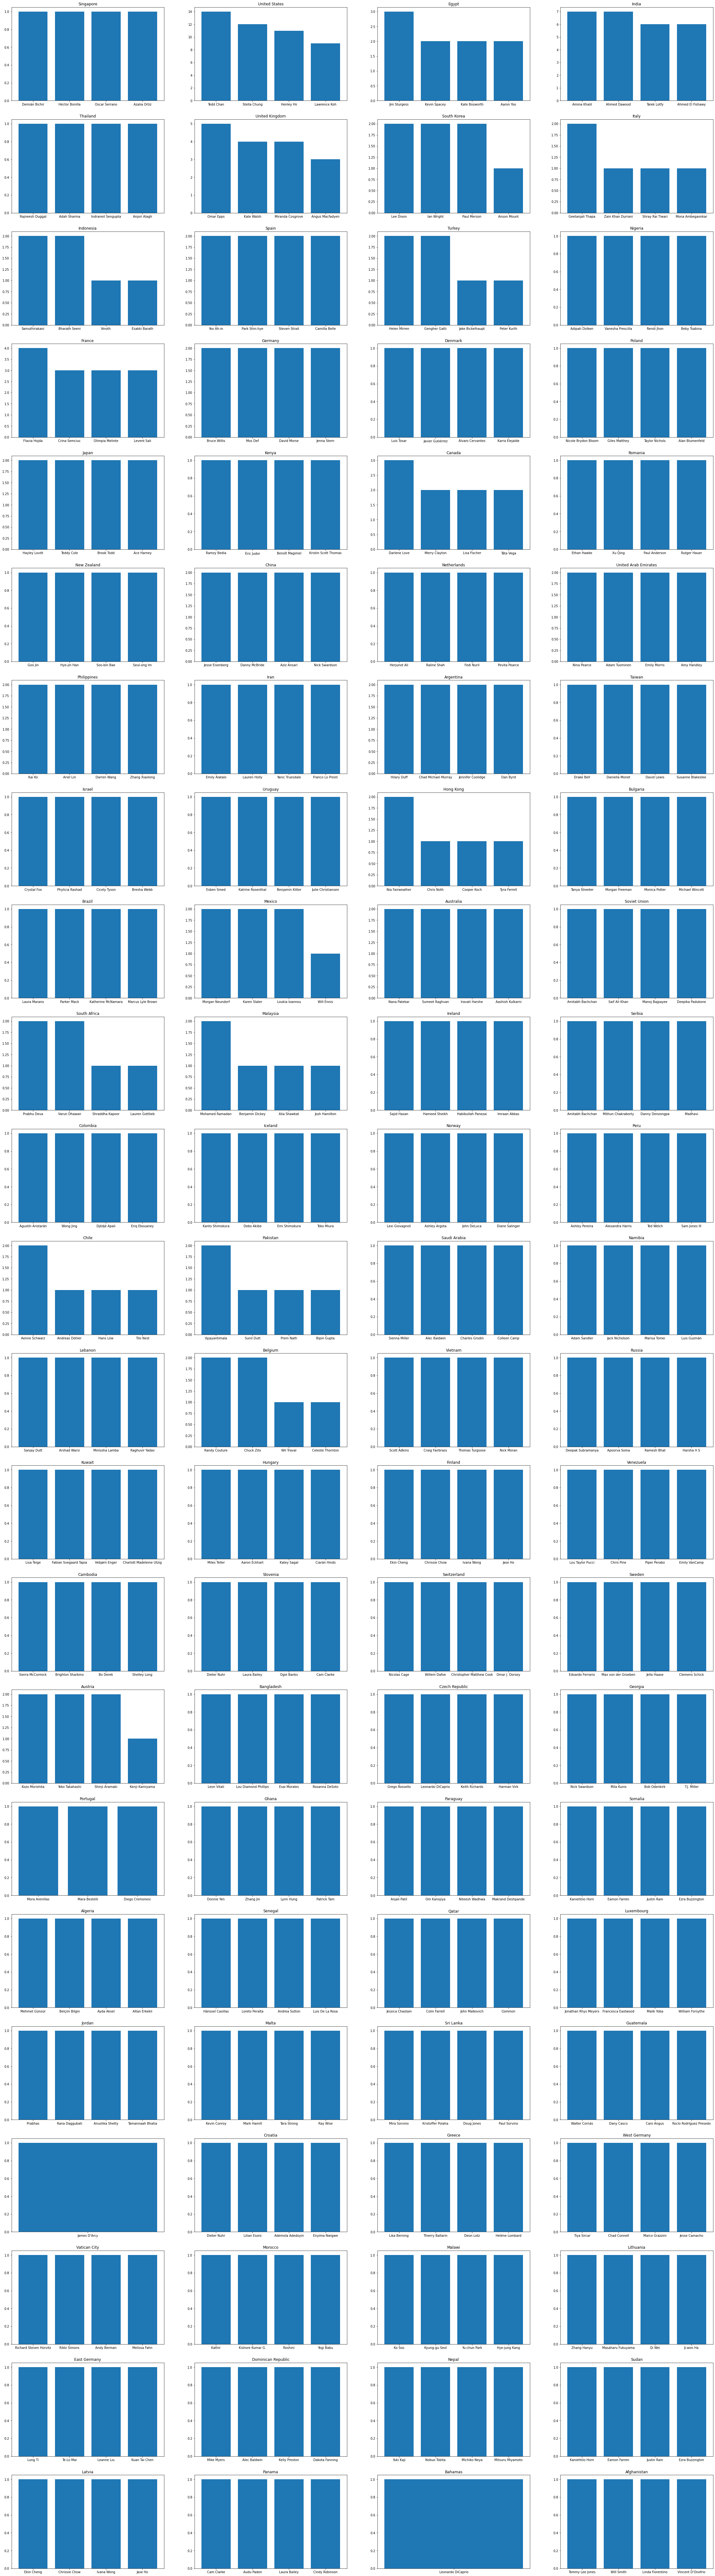









-------------------------------  TV SHOWS -------------------------------










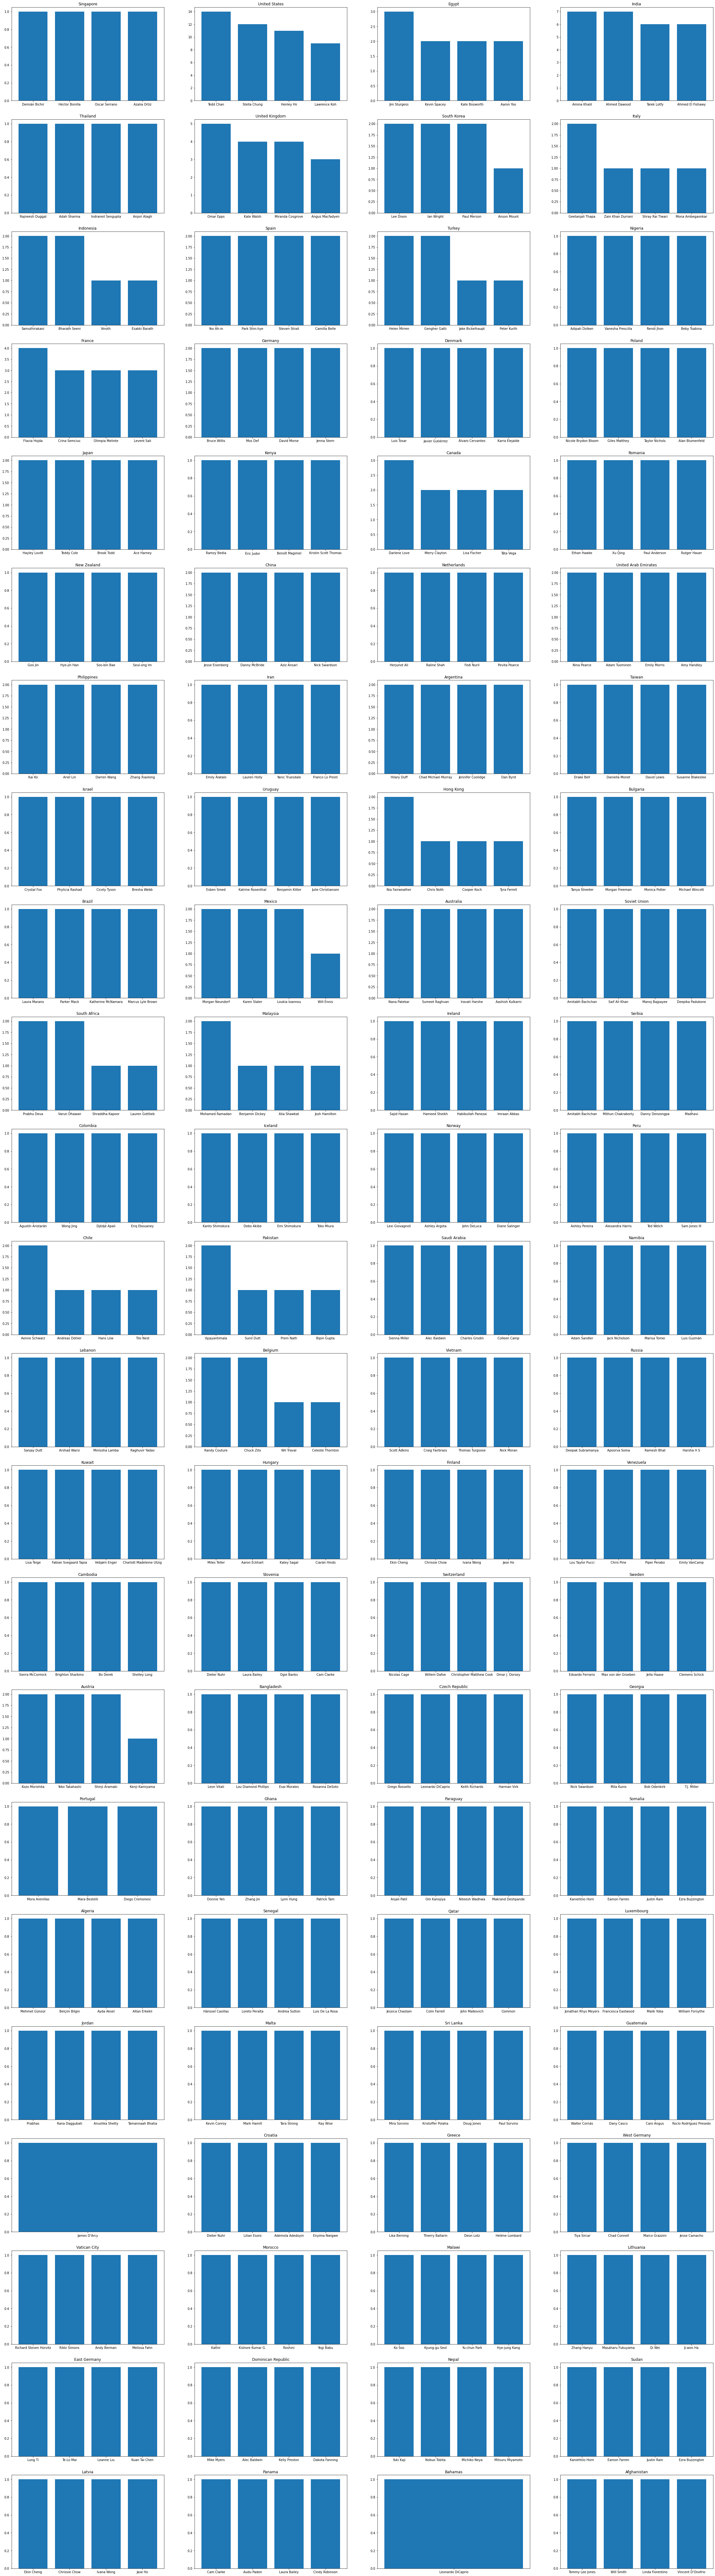

In [ ]:
## Question 5 ##
 
data = netflix_ds.drop(netflix_ds.columns.difference(['country', 'cast', 'type']),1)
 
data = data.dropna(axis=0)
 
# for each unique country in the dataset 
# plot diagram with 5 actors with most movies in that country
# do same with movies
 
movie_df = data[data['type'] == "Movie"].drop(['type'],1)

newdf = pd.DataFrame(movie_df.country.str.replace(', ',',').str.split(',').tolist())
movie_df = pd.concat([movie_df, newdf], axis=1)
# column not needed anymore since it being split is all we want
movie_df = movie_df.drop(['country'], 1)
movie_df = movie_df.melt(id_vars=["cast"], value_name="country")
# drop nans
movie_df = movie_df.dropna(axis=0)
# drop variable column which melt creates, its not needed just its values i.e. listed_in
movie_df = movie_df.drop(['variable'], 1)
 
# movie_df now contains one country in each cell and cast as it was
 
unique_countries_movies = movie_df.country.unique()

fig, axes = plt.subplots(23,4,figsize=(40,150))

x=0
y=0


posList = [0,1,2,3]*23
for country, y in zip(unique_countries_movies, posList):
  df = movie_df[movie_df['country'] == country].drop(['country'],1)
  df = pd.DataFrame(df.cast.str.replace(', ',',').str.split(',').tolist(), index=df.cast).stack()
  df = df.reset_index([0, 'cast'])
  df.columns = ['cast', 'splitCast']
  axes[x][y].title.set_text(country)
  axes[x][y].bar(df.splitCast.head(4), df.splitCast.value_counts().head(4))
  if (y==3):
    x = x + 1

plt.show()
  


 
 # do the same for tv shows
print("\n\n\n\n\n\n\n\n-------------------------------  TV SHOWS -------------------------------\n\n\n\n\n\n\n\n")


tv_show_df = data[data['type'] == "TV Show"].drop(['type'],1)

newdf = pd.DataFrame(tv_show_df.country.str.replace(', ',',').str.split(',').tolist())
tv_show_df = pd.concat([tv_show_df, newdf], axis=1)
# column not needed anymore since it being split is all we want
tv_show_df = tv_show_df.drop(['country'], 1)
tv_show_df = tv_show_df.melt(id_vars=["cast"], value_name="country")
# drop nans
tv_show_df = tv_show_df.dropna(axis=0)
# drop variable column which melt creates, its not needed just its values i.e. listed_in
tv_show_df = tv_show_df.drop(['variable'], 1)
 
# movie_df now contains one country in each cell and cast as it was
 
unique_countries_movies = movie_df.country.unique()

fig, axes = plt.subplots(23,4,figsize=(40,150))

x=0
y=0


posList = [0,1,2,3]*23
for country, y in zip(unique_countries_movies, posList):
  df = movie_df[movie_df['country'] == country].drop(['country'],1)
  df = pd.DataFrame(df.cast.str.replace(', ',',').str.split(',').tolist(), index=df.cast).stack()
  df = df.reset_index([0, 'cast'])
  df.columns = ['cast', 'splitCast']
  axes[x][y].title.set_text(country)
  axes[x][y].bar(df.splitCast.head(4), df.splitCast.value_counts().head(4))
  if (y==3):
    x = x + 1

plt.show()






ΕΡΩΤΗΜΑ 6 : Στο ερώτημα αυτό ασχολούμαστε με τις στήλες type και rating. Αρχικά δημιουργούμε 2 dataset ενα με ταινίες και ένα με σειρές. Στη συνέχεια μετράμε πόσες ταίνιες και σειρές αντιστοιχούν σε κάθε ηλικία σύμφωνα με τη σήμανση του netflix και κάνουμε τα αντίστοιχα διαγράμματα.

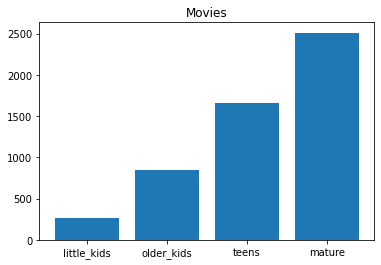

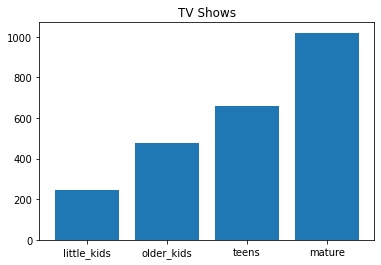

In [ ]:
## Question 6 ##
# Little kids ==> G, TV-Y, TV-G
# Older kids  ==> PG, TV-Y7, TV-Y7-FV, TV-PG
# Teens       ==> PG-13, TV-14
# Mature      ==> R, NC-17, TV-MA

age_categories_df = netflix_ds.drop(netflix_ds.columns.difference(['type', 'rating']),1)

movie_df = age_categories_df[age_categories_df['type'] == "Movie"].drop(['type'],1)
tv_show_df = age_categories_df[age_categories_df['type'] == "TV Show"].drop(['type'],1)

## FOR MOVIES ##
df = movie_df[movie_df['rating'] != "NR"]
df = df[df['rating'] != "UR"]
df = df.rating.value_counts()
little_kids = df['G'] + df['TV-Y'] + df['TV-G']
older_kids = df['PG'] + df['TV-Y7'] + df['TV-Y7-FV'] + df['TV-PG']
teens = df['PG-13'] + df['TV-14']
mature = df['R'] + df['NC-17'] + df['TV-MA']

plt.title("Movies")
plt.bar(['little_kids', 'older_kids', 'teens', 'mature'], [little_kids, older_kids, teens, mature])
plt.show()

## FOR TV SHOWS ##
df = tv_show_df[tv_show_df['rating'] != "NR"]
df = df[df['rating'] != "UR"]
df = df.rating.value_counts()
little_kids = df['TV-Y'] + df['TV-G']
older_kids =  df['TV-Y7'] + df['TV-Y7-FV'] + df['TV-PG']
teens =  df['TV-14']
mature = df['R'] + df['TV-MA']

plt.title("TV Shows")
plt.bar(['little_kids', 'older_kids', 'teens', 'mature'], [little_kids, older_kids, teens, mature])
plt.show()


ΕΡΩΤΗΜΑ 7 : Πήραμε τις στήλες listed_in και date_added, ύστερα χωρίσαμε τις ημερομηνίες και διώξαμε την μέρα μιας και δεν την θέλαμε και απλώς κρατήσαμε μια στήλη το listed_in, μια στήλη τον μήνα και μια στήλη την χρονιά, Στη συνέχεια κάναμε τα διαγράμματα για κάθε μήνα.
Δοκιμάσαμε να βάλουμε όλους τους μήνες σε ένα διάγραμμα ώστε να φαίνεται πιο ξεκάθαρα οι διαφορές τους αλλά τελικά δεν διαβαζόταν καθόλου, οπότε καταλήξαμε να κάνουμε διαγράμματα για κάθε μήνα ξεχωριστά. 

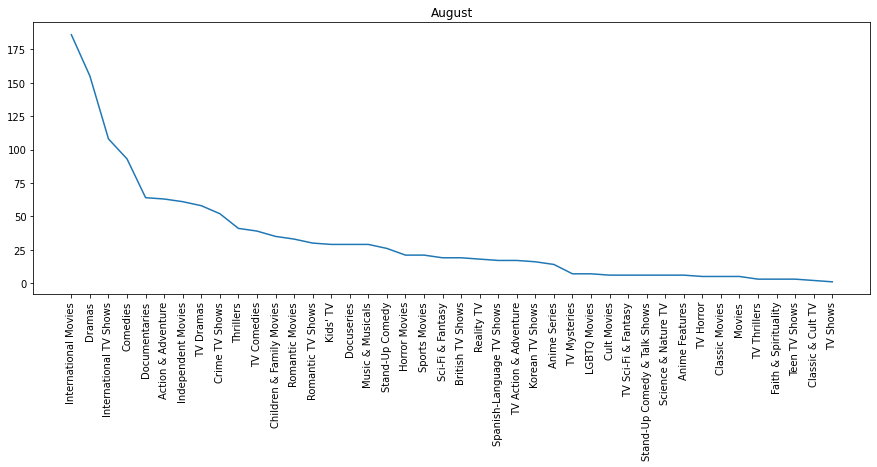

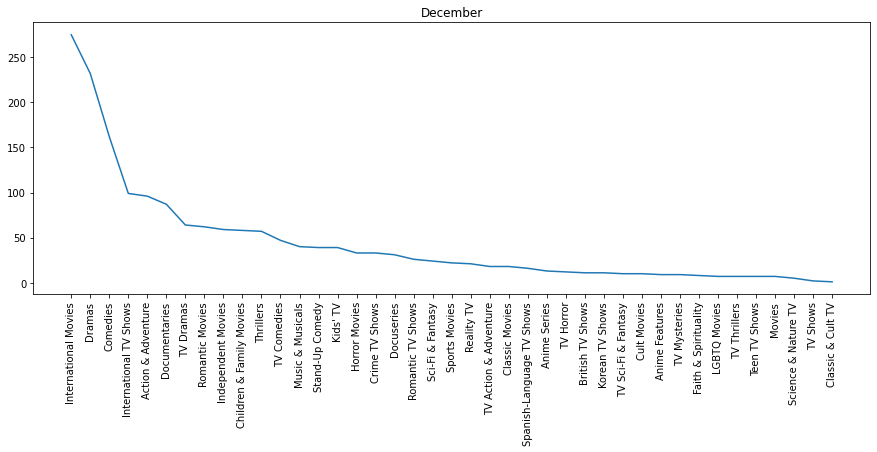

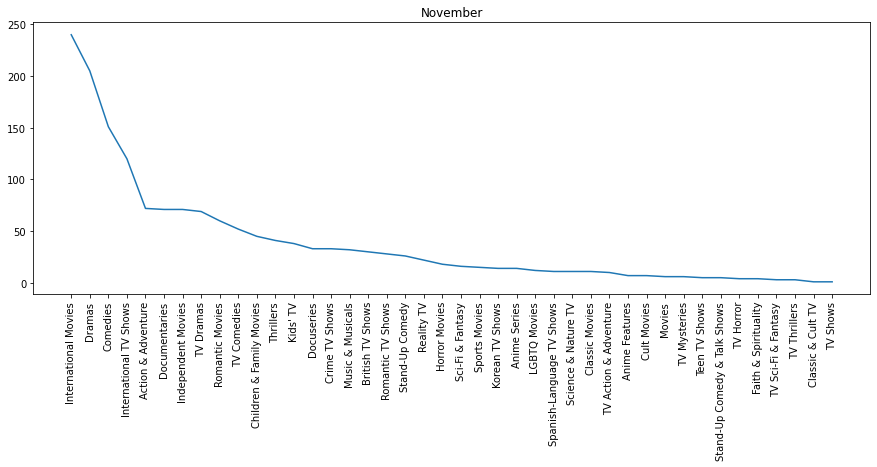

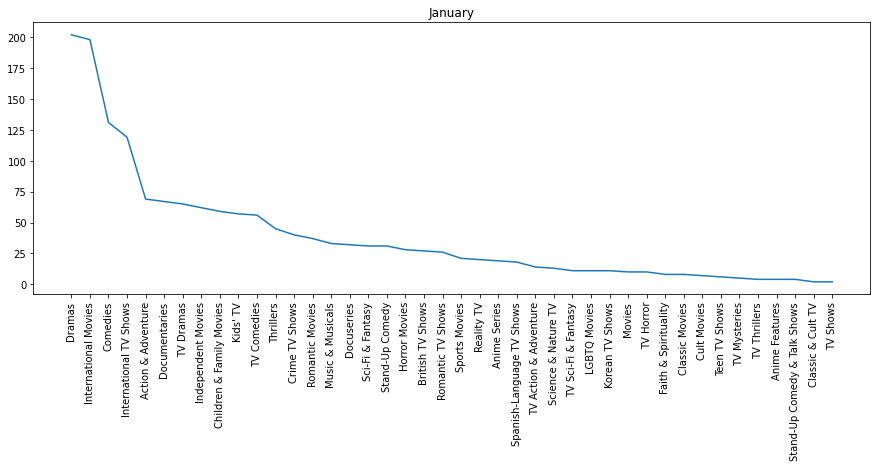

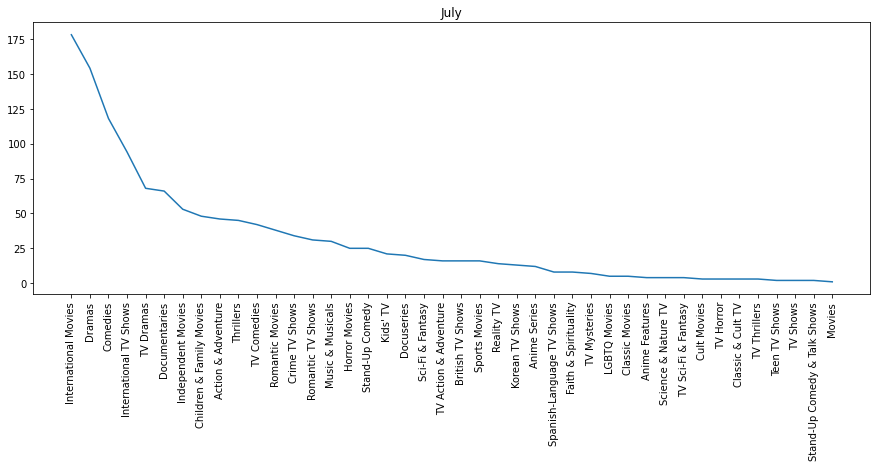

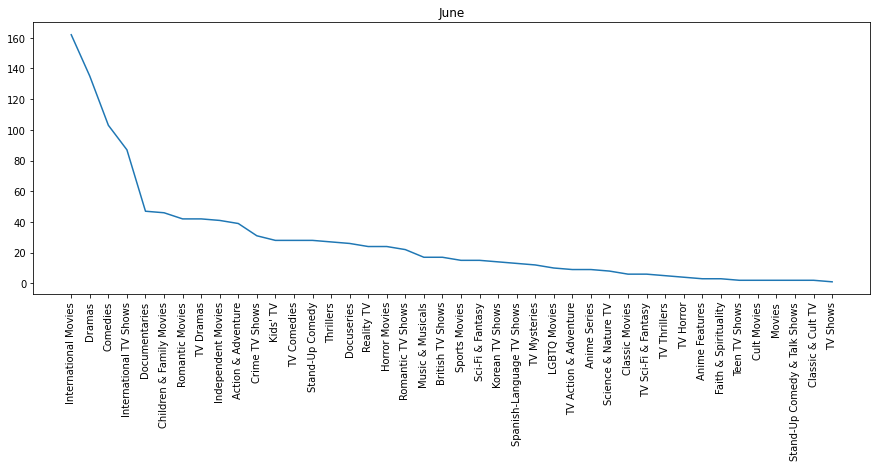

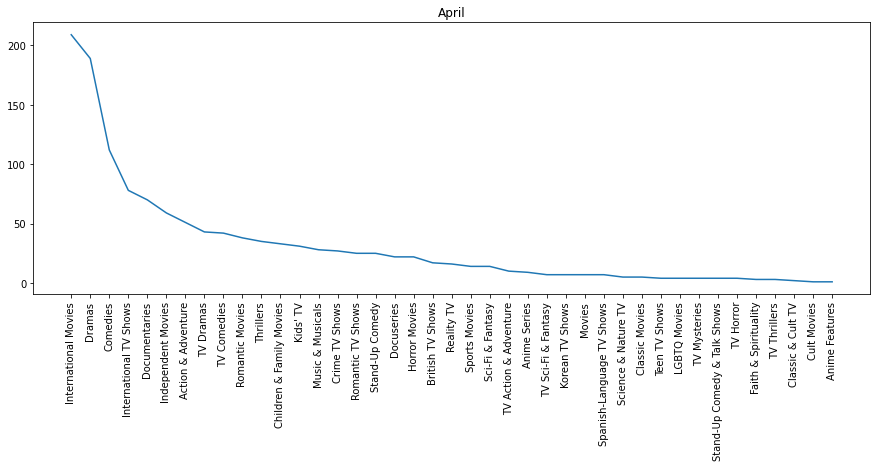

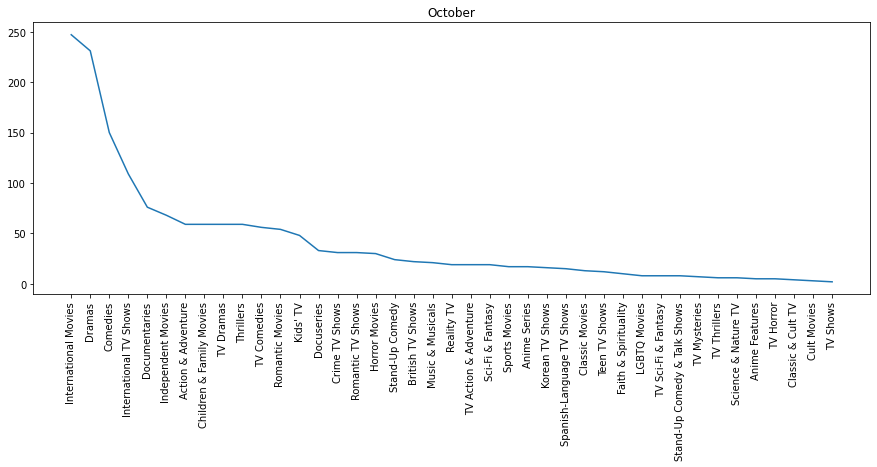

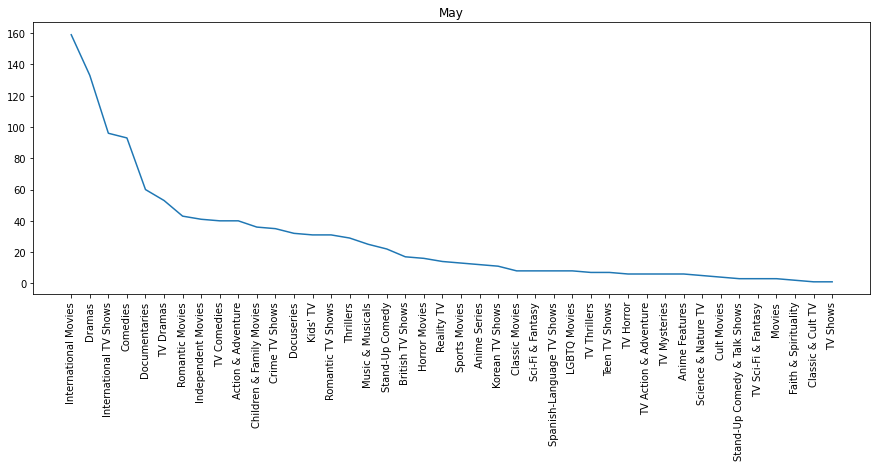

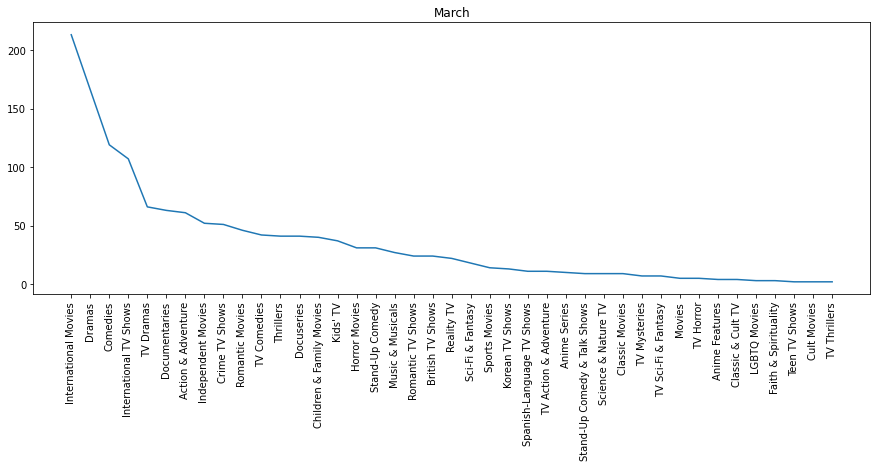

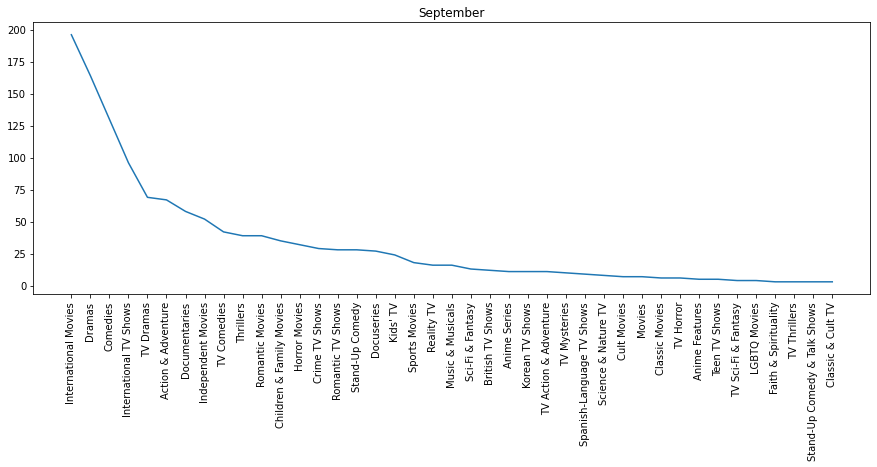

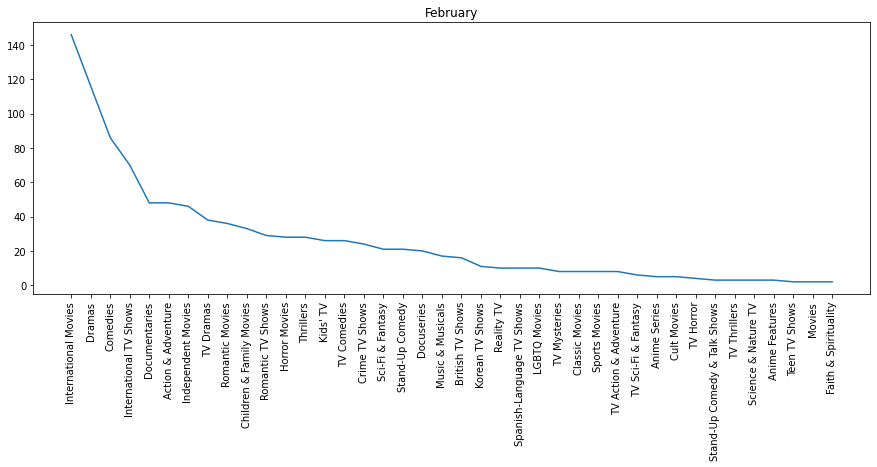

In [ ]:
## Question 7 ##

df = netflix_ds.drop(netflix_ds.columns.difference(['listed_in', 'date_added']),1)
df = df.dropna()
temp = df.listed_in

df = pd.DataFrame(df.date_added.str.replace(', ',',').str.split(',').tolist(), index=df.date_added)
df = df.reset_index([0, 'date_added']).drop(['date_added'],1)
df.columns = ['month', 'year']

dates = pd.concat([pd.DataFrame(df.month.str.split(' ').tolist()) , df.year], axis=1).drop(2,1)
df = pd.concat([dates, temp], axis=1).drop(1,1).dropna()
df.columns = ['month', 'year', 'listed_in']

# now our df only got 3 columns, month year listed_in

# plot the average of each month for the average of years
unique_months = average.month.unique()[:-1]
average = df.drop('year',1)
average = pd.DataFrame(average.listed_in.str.replace(', ',',').str.split(',').tolist(), index=average.month).stack()
average = average.reset_index([0, 'month'])
average.columns = ['month', 'listed_in']

for month in unique_months:
  df = average[average['month'] == month].drop('month',axis=1)
  df = pd.DataFrame(df.listed_in.str.replace(', ',',').str.split(',').tolist(), index=df.listed_in).stack()
  df = df.reset_index([0, 'listed_in'])
  df.columns = ['listed_in', 'listed_in_split']
  # print(month," ------ ", df.listed_in_split.value_counts().head(1))
  plt.figure(figsize=(15,5))
  plt.xticks(rotation=90)
  plt.title(month)
  plt.plot(df.listed_in_split.value_counts())
plt.show()

ΕΡΩΤΗΜΑ 8 : Πήραμε τη στήλη listed_in και για κάθε κατηγορία περιεχομένου μετρήσαμε πόσες φορές εμφανίζεται στα δεδομένα μας και απεικονίσαμε την πληροφορία σε ένα plot.

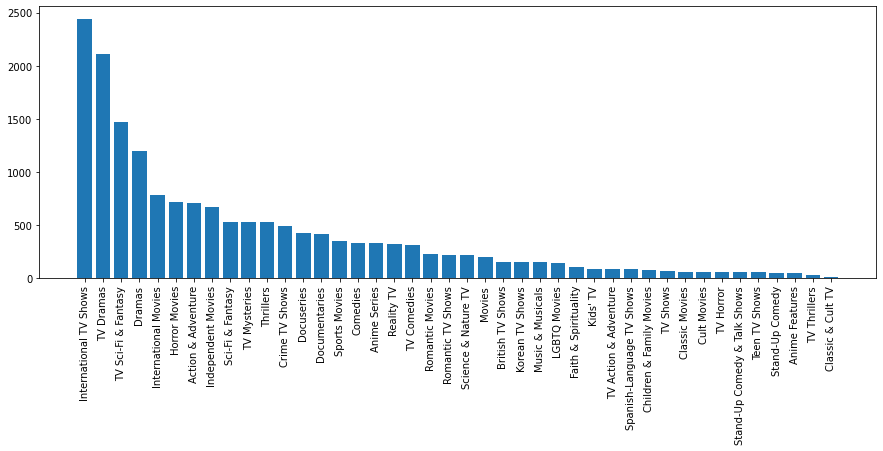

In [ ]:
## Question 8 ##

df = netflix_ds.drop(netflix_ds.columns.difference(['listed_in']),1)
df = df.dropna()

df = pd.DataFrame(df.listed_in.str.replace(', ',',').str.split(',').tolist(), index=df.listed_in).stack()
df = df.reset_index([0, 'listed_in']).drop(['listed_in'],1)
df.columns = ['listed_in_split']

plt.figure(figsize=(15,5))
plt.bar(df['listed_in_split'].unique(), df.value_counts())
plt.xticks(rotation=90)
plt.show()


Για την ερώτηση 9 στο πρώτο μέρος βρήκαμε για κάθε χώρα το top 3 των σκηνοθετών που έχουν γυρίσει τις περισσότερες ταινίες/σειρές που υπάρχουν στο νέτφλιξ εκει.Στο δεύτερο μέρος για τα δεδομένα του imbd βρήκαμε για την κάθε χώρα το top 3 των σκηνοθετών με το μεγαλύτερο μέσο όρο ψήφων από όλες τους τις ταινίες/σειρές που έχουν γυρίστεί σε αυτήν την χώρα. Επειδή τα διαγράμματα είναι αρκετά και δεν φαίνονται πολύ καλά τα δεκαδικά ψηφία στο rating έχουν εκτυπωθεί οι αριθμοί και παραπάνω

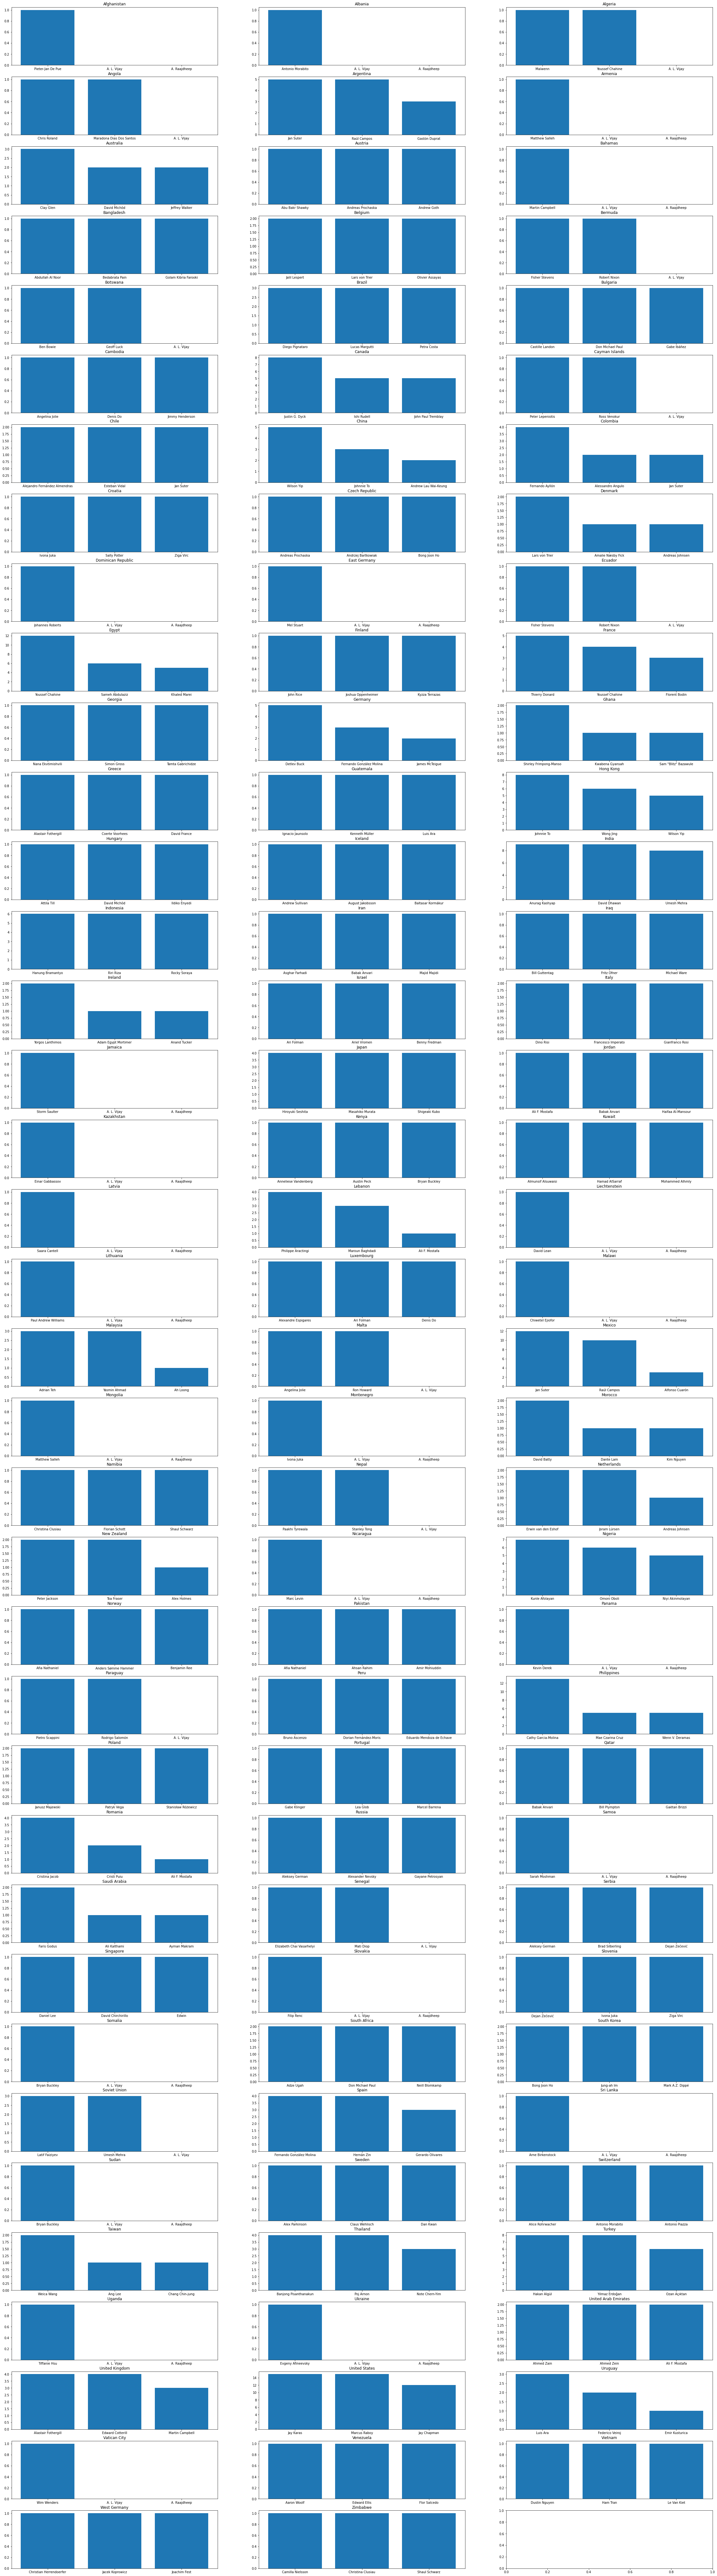

In [ ]:
# Question 9 ##

## Split the countries of a movie on different rows
directors_ctr = netflix_ds[['director','country']]
## drop duplicates #
directors_ctr = directors_ctr.dropna(axis=0)

#split multiple countries into different rows
directors_ctr = pd.DataFrame(directors_ctr.country.str.replace(', ',',').str.split(',').tolist(), index=directors_ctr.director).stack()
directors_ctr = directors_ctr.reset_index([0, 'director'])
directors_ctr.columns = ['director', 'country']
## Split the directors of a movie on different rows
directors_ctr = pd.DataFrame(directors_ctr.director.str.replace(', ',',').str.split(',').tolist(), index=directors_ctr.country).stack()
directors_ctr = directors_ctr.reset_index([0, 'country'])
directors_ctr.columns = ['country', 'director']
## group by country ##
directors_cntr = directors_ctr.groupby('country')
## find out top 3 directors with most neflix movies made at every country##
directors = directors_cntr['director'].value_counts().unstack(fill_value=0)
directors = directors.iloc[1:]


fig, axes = plt.subplots(37,3,figsize=(40,150))

x=0
y=0

posList = [0,1,2]*37
for (index, row),y in zip(directors.iterrows(),posList):
  axes[x][y].title.set_text(index)
  to_print=row.nlargest(3)
  to_print = pd.DataFrame(to_print).reset_index()
  to_print.columns=['director','Number_Movies']
  # print(to_print.director,to_print.Number_Movies)
  axes[x][y].bar(to_print.director,to_print.Number_Movies)
  if (y == 2):
    x = x + 1
plt.show()


Afghanistan              director  avg_rating
0        Marc Forster        7.60
1         Atiq Rahimi        7.35
2  Marzieh Makhmalbaf        7.10
Albania             director  avg_rating
0  Antoneta Kastrati         9.1
1      Mevlan Shanaj         8.7
2    Lendita Zeqiraj         8.2
Algeria            director  avg_rating
0      Costa-Gavras         8.3
1  Gillo Pontecorvo         8.1
2      Ettore Scola         7.8
Andorra        director  avg_rating
0  Ventura Pons         5.1
1     Jose Pozo         4.9
2    Jordi Gigó         3.7
Angola            director  avg_rating
0    Sarah Maldoror         7.1
1  Maria João Ganga         6.6
2       Zézé Gamboa         6.4
Argentina             director  avg_rating
0       José Padilha         8.1
1     Lars von Trier         8.0
2  Arianne Benedetti         7.9
Armenia          director  avg_rating
0  Mher Mkrtchyan         8.4
1     Anahid Abad         7.2
2    Don Askarian         7.1
Aruba                director  avg_rating
0        

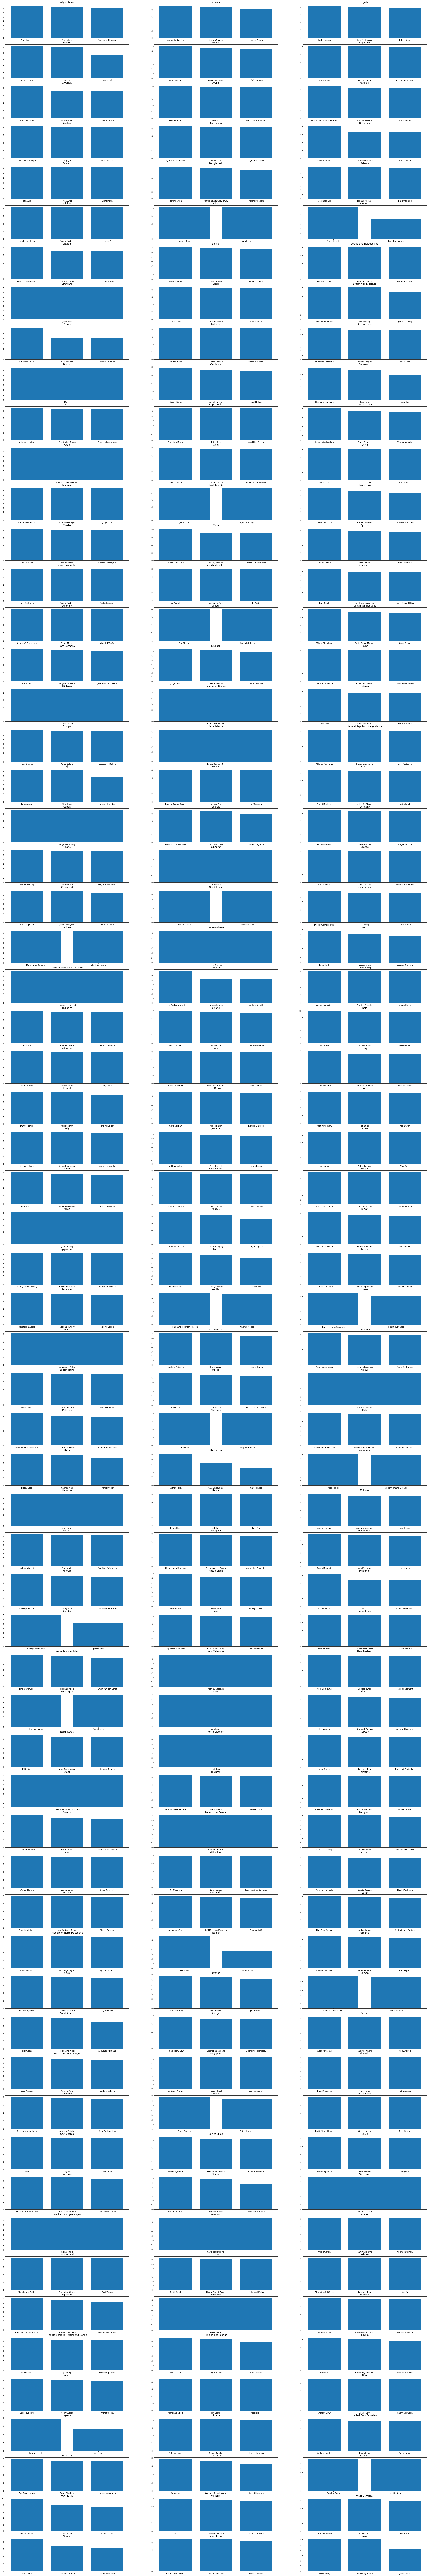

In [ ]:
###################
## find out top 3 directors with movies/series produced at country dudging from their average IMDb movie ratings in that country ##

Imdb_ds.dtypes
return_directors = []
directors_ctr_start = Imdb_ds[['director','country','avg_vote']]
directors_ctr_start = directors_ctr_start.dropna(axis=0)

##separate multiple countries on a movie and place them into a different row
directors_ctr = pd.DataFrame(directors_ctr_start.country.str.replace(', ',',').str.split(',').tolist(), index=[directors_ctr_start['director'],directors_ctr_start['avg_vote']]).stack()
directors_ctr = directors_ctr.reset_index([0, 'director','avg_vote'])
directors_ctr.columns = ['director','avg_vote','country']
# print(directors_ctr)
##separate multiple directors on a movie and place them into a different row
directors_ctr = pd.DataFrame(directors_ctr.director.str.replace(', ',',').str.split(',').tolist(), index=[directors_ctr['country'],directors_ctr['avg_vote']]).stack()
directors_ctr = directors_ctr.reset_index([0,'country','avg_vote'])
directors_ctr.columns = ['country','avg_vote','director']
# print(directors_ctr)

#group data by country

directors_per_country = directors_ctr.groupby('country')

fig, axes = plt.subplots(64,3,figsize=(40,250))

x=0
y=0
posList = [0,1,2]*64

for (key, item),y in zip(directors_per_country,posList):
  group = directors_per_country.get_group(key)
  # print(group)
  # to_print = group.nlargest(3,'avg_vote')
  # print(to_print)
  # to_print.plot(kind='bar')
  # plt.show()
  group2 = group.groupby(['director'])
  array = []
#group each country's data by director
#for every director calculate the mean of his movies/series avg votes and save it on a list
  for key2, item2 in group2:
    array.append((key2,group2.get_group(key2)['avg_vote'].mean()))
  #convert list into dataframe and print the top 3 directors 
  to_return = pd.DataFrame(array,columns=['director','avg_rating'])
  to_return = to_return.set_index('director')
  topcountry = to_return.nlargest(3,'avg_rating')
  topcountry = topcountry.reset_index()
  topcountry.columns=['director','avg_rating']
  print(key,topcountry)
  axes[x][y].title.set_text(key)
  axes[x][y].bar(topcountry.director,topcountry.avg_rating)
  if (y == 2):
    x = x + 1
plt.show()

#############

Στο ερώτημα 10 μελετάμε τις σειρές και το πότε ολοκληρώθηκαν ποσοτικά. Παρατηρούμε πως οι περισσότερες είχαν διάρκεια 1 season . Παρουσιάζουμε τα νούμερα.

duration  
1 Season      1608
2 Seasons      382
3 Seasons      184
4 Seasons       87
5 Seasons       58
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       6
11 Seasons       3
15 Seasons       2
13 Seasons       2
12 Seasons       2
16 Seasons       1
dtype: int64


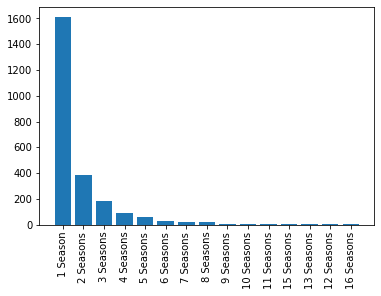

In [ ]:
## Question 10 ##

new_data = netflix_ds[['type','duration']]
tv_show_df = new_data[new_data['type'] == "TV Show"].drop(['type'],1)
tv_show_df = tv_show_df.value_counts()
print(tv_show_df)
tv_show_df = pd.DataFrame(tv_show_df).reset_index()
tv_show_df.columns=['duration','Number_Series']
plt.bar(tv_show_df['duration'], tv_show_df['Number_Series'])
plt.xticks(rotation=90)
plt.show()



In [ ]:
Location_imdb_ratings = r'/content/drive/My Drive/IMDb ratings.csv'
 
Imdb_ratings_ds = pd.read_csv(Location_imdb_ratings)
# Imdb_ratings_ds

Για το ερώτημα 11 αρχικά κάνουμε merge τα αρχεία του IMDb γραμμή με γραμμή (έχουν το ίδιο order) και στην συνέχεια αφού κρατήσουμε τις στήλες που θέλουμε κάνουμε merge με το αρχείο του netflix στην στήλη του τίτλου. Αν οι στήλες των σκηνοθετών και τον χωρών έχουν την ίδια τιμή έχουμε βρει κρατάμε την ταινία. Έτσι στο τέλος βρίσκουμε τους τίτλους εκείνους που περιέχονται και στα 2(3) αρχεία έχοντας και την στήλη της βαθμολογίας τους. Επιλέγουμε τα στοιχεία με τις 10 μεγαλύτερες βαθμολογίες. Λόγω του παρακάτω λινκ του imdb που θεωρεί ότι η πιο αντιπροσωπευτική και ορθή μορφή rating είναι το weighted_average_vote χρησιμοποιήσαμε αυτό το column. 

In [ ]:
## Question 11 ##
## https://help.imdb.com/article/imdb/track-movies-tv/the-vote-average-for-film-x-should-be-y-why-are-you-displaying-another-rating/G3RC8ZNFAGWNTX4L?ref_=helpart_nav_9 ## 

mergedDf = Imdb_ds.merge(Imdb_ratings_ds, left_index=True, right_index=True)
mergedDf = mergedDf[(mergedDf.imdb_title_id_x == mergedDf.imdb_title_id_y)] ##just for safety reasons##
# Imdb_ds
mergedDf
mergedDf = mergedDf.drop(mergedDf.columns.difference(['title', 'director','weighted_average_vote','country']),1)
mergedDF = mergedDf.dropna(axis=0)
# mergedDf
netflixDf = netflix_ds[['title','director','type','country']]
netflixDf = netflixDf[netflixDf['type'] == "Movie"].drop(['type'],1)
netflixDf = netflixDf.dropna(axis=0)
completeDf = netflixDf.merge(mergedDf,on='title',how='left')
completeDf = completeDf[(completeDf.director_x == completeDf.director_y) & (completeDf.country_x == completeDf.country_y)]
completeDf = completeDf.drop(['country_y','director_y'],axis=1)
to_print = completeDf.nlargest(10,'weighted_average_vote')
to_print = to_print.rename(columns={'director_x': 'director', 'country_x': 'country'})
to_print



,title,director,country,weighted_average_vote
1377,Eh Janam Tumhare Lekhe,Harjit Singh,India,8.6
1738,Gol Maal,Hrishikesh Mukherjee,India,8.6
2452,Koshish,Gulzar,India,8.6
3286,Oththa Seruppu Size 7,Parthiban,India,8.6
717,Black Friday,Anurag Kashyap,India,8.5
76,3 Idiots,Rajkumar Hirani,India,8.4
1140,Dangal,Nitesh Tiwari,India,8.4
2646,Love Ni Bhavai,Saandeep Patel,India,8.4
2796,Masoom,Shekhar Kapur,India,8.4
3503,Qismat,Jagdeep Sidhu,India,8.4


Παρακάτω ορίζουμε τα 2 μοντέλα, κάνουμε fit_transform δημιουργώντας το vocabulary με βάση την στήλη description και επιστρέφοντας τους boolean πίνακες ή tdf για την κάθε περίπτωση


In [ ]:
 ###### PART 2 #######
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Question 1 ##
#1.1#
recommendation_data = netflix_ds[['show_id','title','description']]
recommendation_data = recommendation_data.dropna(axis=0)
bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=11000,
stop_words='english',ngram_range=(1, 2))
bow_xtrain = bow_vectorizer.fit_transform(recommendation_data['description']) 
print("Bag-of-words")
print(bow_xtrain.shape)
print(bow_vectorizer.get_feature_names())
print(bow_xtrain.toarray())

## less features leads to worst representation ##

#1.2#
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=1.0, min_df=1, max_features=11000,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(recommendation_data['description'])
print("TF-IDF")
print( tfidf.shape)
print(tfidf_vectorizer.get_feature_names())
print(tfidf.toarray())


Bag-of-words
(7787, 11000)
['000', '000 euros', '000 prize', '000 years', '007', '10', '10 000', '10 year', '10 years', '100', '100 000', '10th', '11', '11 year', '12', '12 year', '12 years', '13', '13 year', '13 years', '14', '14 year', '14th', '14th century', '15', '15 year', '15 years', '16', '16 year', '16 years', '16th', '16th century', '17', '17 year', '17th', '17th century', '18', '18 year', '18th', '18th century', '19', '1900s', '1920s', '1930s', '1940s', '1950s', '1960s', '1961', '1962', '1967', '1968', '1969', '1970s', '1971', '1975', '1976', '1979', '1980', '1980s', '1981', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990s', '1991', '1992', '1992 la', '1993', '1994', '1995', '1996', '1997', '1997 murder', '1998', '1999', '19th', '19th century', '20', '20 somethings', '20 year', '20 years', '200', '2001', '2003', '2006', '2008', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '20s', '20s having', '20th', '20th century', '21

Υπολογίζουμε κάποιες αποστάσεις μεταξύ 2 ταινιών όπως ζητάει το 2.1 και το 2.2

In [ ]:
def similarity_between_movies(feature_Vector1,feature_Vector2,method):
  feature_Vector1 = np.array([feature_Vector1,])
  feature_Vector2 = np.array([feature_Vector2,])
  sim = 1 - pairwise_distances(feature_Vector1,feature_Vector2,metric = method)
  return sim[0]

In [ ]:
## 2.1 , 2.2 ##
rec_index = recommendation_data.index
number_of_rows = len(rec_index)
randint_x = random.randint(-1,number_of_rows)
randint_y = random.randint(-1,number_of_rows)
print(randint_x,randint_y)
print(similarity_between_movies(bow_xtrain.toarray()[randint_x],bow_xtrain.toarray()[randint_y],'jaccard'))
print(similarity_between_movies(tfidf.toarray()[randint_x],tfidf.toarray()[randint_y],'cosine'))


3917 3959


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[0.03571429]
[0.01831688]


Βρίσκουμε όλες τις αποστάσεις από όλα στοιχεία προς όλα τα στοιχεία. Επειδή το similarity έιναι αντιστρόφως ανάλογο του distance για να βρούμε τα top 100 παίρνουμε τις 100 μικρότερες τιμές της απόστασης με την argsort.(εξαιρούμε την πρώτη που είναι ο εαυτός τους). Θα μπορούσαμε να το κάνουμε convert σε similarity = 1 - distaces_array και να πάρουμε τις 100 μεγαλύτερες τιμές στο (0,1) αλλά κάνουμε το ίδιο πράγμα ανάποδα παίρνοντας τις μικρότερες

In [ ]:
## Question 2 100 closest ##

jaccard_countVectorizer = pairwise_distances(bow_xtrain.toarray(),bow_xtrain.toarray(), metric='jaccard')




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [ ]:
##2.2##

cosine_tfidf = pairwise_distances(tfidf.toarray(),tfidf.toarray(), metric='cosine')

Βρίσκουμε τα indexes για τις 100 πιο κοντινές περιγραφές και τις αποθηκεύουμε σε ένα dictionary με κλειδί το index της κάθε ταινίας. Δημιουργούμε τα 2 λεξικά που ζητάει η εκφώνηση σε περίπτωση που χρειάζεται εκτύπωση των 100 κοντινότερων κάποιας ταινίας by index κάντε uncomment τις 3 τελευταίες γραμμές


In [ ]:
def print_dfmovie_titles(indexes_array,df):                           ##prints rows of indexes_array given
  toprintdf = pd.DataFrame(columns=['show_id','title','description'])
  for i in indexes_array:
    toprintdf.loc[i] = df.loc[i]
  display(toprintdf)

In [ ]:
index = 0
DictTFMovies = {}
for every_movie in cosine_tfidf:
  idx = every_movie.argsort()[:101]
  # res_list = [every_movie[i] for i in idx]
  DictTFMovies[index] = idx[1:]
  index+=1
  # print(res_list)

# index_wanted = 0
# print(DictTFMovies[index_wanted])
# print_dfmovie_titles(DictTFMovies[index_wanted],recommendation_data)

In [ ]:
index = 0
DictCountVectMovies = {}
for every_movie in jaccard_countVectorizer:
  idx = every_movie.argsort()[:101]
  # res_list = [every_movie[i] for i in idx]
  DictCountVectMovies[index] = idx[1:]
  index+=1
  # print(res_list)

# index_wanted = 0
# print(DictCountVectMovies[index_wanted])
# print_dfmovie_titles(DictCountVectMovies[index_wanted],recommendation_data)

In [ ]:
def get_topNclosest(distances_array,N = 10):      ## inputs an array with distances and outputs N closest distances indexes
  idx = distances_array.argsort()[:N]
  # res_list = [distances_array[i] for i in idx]
  # print(res_list)
  return idx

In [ ]:
## Question 2.4 ##

def get_similar_movies2(movie_desc, method,N):
  if method == 'tf-idf':
    movie_arr = tfidf_vectorizer.transform([movie_desc])
    distances_moviearr = pairwise_distances(movie_arr.toarray(),tfidf.toarray(), metric='cosine')
    closest_suggestions = get_topNclosest(distances_moviearr[0],N)
    print_dfmovie_titles(closest_suggestions,recommendation_data)
  elif method == 'boolean':
    boolmovie_arr = bow_vectorizer.transform([movie_desc])
    distances_jcmoviearr = pairwise_distances(boolmovie_arr.toarray(),bow_xtrain.toarray(), metric='jaccard')
    closest_suggestions = get_topNclosest(distances_jcmoviearr[0],N)
    print_dfmovie_titles(closest_suggestions,recommendation_data)


Με κάποια σύντομα παραδείγματα που τρέξαμε για την get_similar_movies2 παρατηρούμε ότι μπορεί να υπάρχουν αστοχίες επειδή δεν λογίζεται η σημασιολογική ομοιότητα ανάμεσα στις λέξεις(δηλ. λέξεις με παρόμοιο περιεχόμενο δεν ταυτίζονται).Αυτό το βλέπουμε και από τα αποτελέσματα των παραδειγμάτων όπου υπάρχει σαφής λεξικογραφική ταύτιση με τις άλλες περιγραφές και σημασιολογική. Με μια αναζήτηση στο διαδίκτυο διαβάσαμε πως μπορεί να αργεί για μεγάλα vocabularies(https://www.cs.toronto.edu/~hinton/csc2515/notes/retrieval.pdf) αλλά στην περίπτωση μας δεν παρατηρούμε κάτι τέτοιο-ίσως επειδή το vocabulary δεν είναι και πολύ μεγάλο. Για το Bag-of-words model όπως θα αναφέρουμε και για το 2.3 τα προβλήματα είναι ίδια με το TF-IDF αλλά προστίθεται και ότι πολύ κοινές λέξεις όπως άρθρα(the , a , κ.α) έχουν το ίδιο ακριβώς βάρος με λέξεις που μπορεί να κρύβουν πολύ μεγαλύτερο περιεχόμενο(πχ. στο δεύτερο παράδειγμα οι λέξεις walk,beach έχουν το ίδιο βάρος με τις λέξεις Α , the) και αυτό μπορεί να επιφέρει αστοχίες

In [ ]:
get_similar_movies2('War between America and Vietnam','tf-idf',10)
get_similar_movies2('War between America and Vietnam','boolean',10)


get_similar_movies2('A walk at the beach','tf-idf',5)
get_similar_movies2('A walk at the beach','boolean',5)
# print(recommendation_data['description'][2040])

,show_id,title,description
4879,s4880,Platoon,A soldier grows disillusioned as he's caught b...
2589,s2590,Hamburger Hill,The Vietnam War's horrors come brutally to lif...
1569,s1570,Da 5 Bloods,Four African American veterans return to Vietn...
6980,s6981,The Vietnam War: A Film by Ken Burns and Lynn ...,"Ken Burns presents an epic 10-part, 18-hour ch..."
4359,s4360,My Stupid Boss 2,"Having driven away many of his employees, Boss..."
6848,s6849,The Sapphires,"Sisters Gail, Cynthia and Julie have talent, b..."
2689,s2690,Hell on Wheels,Former Confederate soldier Cullen Bohannon set...
6699,s6700,The Negro Soldier,This documentary urged African Americans to en...
7043,s7044,Thi Mai,"Along with her two friends, a determined woman..."
1189,s1190,Camp X,"Established during World War II, North America..."


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,show_id,title,description
2689,s2690,Hell on Wheels,Former Confederate soldier Cullen Bohannon set...
6699,s6700,The Negro Soldier,This documentary urged African Americans to en...
4879,s4880,Platoon,A soldier grows disillusioned as he's caught b...
2589,s2590,Hamburger Hill,The Vietnam War's horrors come brutally to lif...
3462,s3463,Kulipari: An Army of Frogs,"In a tale of bravery and heroism, fearless fro..."
1569,s1570,Da 5 Bloods,Four African American veterans return to Vietn...
2521,s2522,Grass Is Greener,It lit up jazz and hip-hop – and ignited a war...
6980,s6981,The Vietnam War: A Film by Ken Burns and Lynn ...,"Ken Burns presents an epic 10-part, 18-hour ch..."
4009,s4010,MeatEater,Steven Rinella scrounges in some of America's ...
2487,s2488,"Good Night, and Good Luck",Veteran television newsman Edward R. Murrow fa...


,show_id,title,description
2040,s2041,Evelyn,"Haunted by the suicide of a brother, a directo..."
2854,s2855,Hridaynath,A schoolteacher known for his good deeds and b...
1039,s1040,Bondi Rescue,This reality series follows elite professional...
3954,s3955,Martin Lawrence Live: Runteldat,This provocative film sheds light on actor-com...
3888,s3889,Malibu Rescue: The Next Wave,"As summer returns to Malibu, Team Flounder tak..."


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,show_id,title,description
2040,s2041,Evelyn,"Haunted by the suicide of a brother, a directo..."
7524,s7525,Welcome 2 Karachi,"Denied a U.S. visa, two dim Indian men decide ..."
1039,s1040,Bondi Rescue,This reality series follows elite professional...
2854,s2855,Hridaynath,A schoolteacher known for his good deeds and b...
6567,s6568,The Last Resort,"In the waning days of the 70s, two young photo..."


Για το ερώτημα 3 , θα μπορούσαμε να κάνουμε την παρακάτω δουλειά μέσα στην συνάρτηση get_similar_movies1 για τους τίτλους αλλά δεν υπάρχει λόγος να γίνεται κάθε φορά που καλέιται η συνάρτηση 

In [ ]:
all_titles = netflix_ds['title']
bow_vectorizer_titles = CountVectorizer(max_df=1.0, min_df=1, max_features=6000,
stop_words='english',ngram_range=(1, 2))
bow_titles = bow_vectorizer_titles.fit_transform(all_titles) 

# print("Bag-of-words")
# print(bow_titles.shape)
# print(bow_vectorizer_titles.get_feature_names())
# print(bow_titles.toarray())

tfidf_vectorizer_titles = TfidfVectorizer(ngram_range=(1,2),max_df=1.0, min_df=1, max_features=6000,stop_words='english')
tfidf_titles = tfidf_vectorizer_titles.fit_transform(all_titles)

# print("TF-IDF")
# print(tfidf_titles.shape)
# print(tfidf_vectorizer_titles.get_feature_names())
# print(tfidf_titles.toarray())


In [ ]:
def get_similar_movies1(movie_title, N=10 , method='boolean'):
  if method == 'tf-idf':
    titles_arr = tfidf_vectorizer_titles.transform([movie_title])
    distances_titlesarr = pairwise_distances(titles_arr.toarray(),tfidf_titles.toarray(), metric='cosine')
    closest_suggestions = get_topNclosest(distances_titlesarr[0],N)
    print_dfmovie_titles(closest_suggestions,recommendation_data)
  elif method == 'boolean':
    booltitle_arr = bow_vectorizer_titles.transform([movie_title])
    distances_jctitlesarr = pairwise_distances(booltitle_arr.toarray(),bow_titles.toarray(), metric='jaccard')
    closest_suggestions = get_topNclosest(distances_jctitlesarr[0],N)
    print_dfmovie_titles(closest_suggestions,recommendation_data)

Τα αποτελέσματα που πέρνουμε είναι πάνω-κάτω τα ίδια με μικρές διαφορές.Περιμέναμε επειδή απότι διαβάσαμε στο documentation δεν φαίνεται να γίνεται normalization στο BoW (σε άρθρα κτλ που δεν έχουν πολύ περιεχόμενο) οι διαφορές να είναι λίγο μεγαλύτερες αλλά δεν παρατηρήσαμε κάτι τέτοιο στα παραδείγματα που τρέξαμε. Ίσως επειδή οι τίτλοι δεν περιέχουν και πολλές τέτοιες λέξεις.


In [ ]:
get_similar_movies1('the eternal sunshine of the spotless mind',15,'tf-idf')
get_similar_movies1('the eternal sunshine of the spotless mind',15,'boolean')

,show_id,title,description
5110,s5111,Re:Mind,"Eleven high school classmates awaken, restrain..."
2030,s2031,Eternal Love,After the deities Bai Qian and Ye Hua meet and...
6912,s6913,The Sunshine Makers,Take a trip and witness the rise and fall of T...
2804,s2805,Hope Springs Eternal,When a teen with terminal cancer miraculously ...
4258,s4259,Mr. Sunshine,A young boy who ends up in the U.S. after the ...
6531,s6532,The King: Eternal Monarch,A modern-day Korean emperor passes through a m...
3013,s3014,Inside the Criminal Mind,Explore the psychological machinations and imm...
4106,s4107,Mind Game,"With the help of a cop, a psychologist and a w..."
6668,s6669,The Mind of a Chef,Producer and narrator Anthony Bourdain explore...
6669,s6670,"The Mind, Explained",Ever wonder what's happening inside your head?...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,show_id,title,description
5110,s5111,Re:Mind,"Eleven high school classmates awaken, restrain..."
6912,s6913,The Sunshine Makers,Take a trip and witness the rise and fall of T...
2030,s2031,Eternal Love,After the deities Bai Qian and Ye Hua meet and...
2804,s2805,Hope Springs Eternal,When a teen with terminal cancer miraculously ...
3013,s3014,Inside the Criminal Mind,Explore the psychological machinations and imm...
4258,s4259,Mr. Sunshine,A young boy who ends up in the U.S. after the ...
6531,s6532,The King: Eternal Monarch,A modern-day Korean emperor passes through a m...
4106,s4107,Mind Game,"With the help of a cop, a psychologist and a w..."
6668,s6669,The Mind of a Chef,Producer and narrator Anthony Bourdain explore...
6669,s6670,"The Mind, Explained",Ever wonder what's happening inside your head?...
